In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [ ]:
covid = pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [53]:
covid.shape

(18110, 9)

In [54]:
print(covid.info)

<bound method DataFrame.info of          Sno       Date     Time                      State/UnionTerritory  \
0          1 2020-01-30  6:00 PM                                    Kerala   
1          2 2020-01-31  6:00 PM                                    Kerala   
2          3 2020-02-01  6:00 PM                                    Kerala   
3          4 2020-02-02  6:00 PM                                    Kerala   
4          5 2020-02-03  6:00 PM                                    Kerala   
5          6 2020-02-04  6:00 PM                                    Kerala   
6          7 2020-02-05  6:00 PM                                    Kerala   
7          8 2020-02-06  6:00 PM                                    Kerala   
8          9 2020-02-07  6:00 PM                                    Kerala   
9         10 2020-02-08  6:00 PM                                    Kerala   
10        11 2020-02-09  6:00 PM                                    Kerala   
11        12 2020-02-10  6:00 PM

In [55]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [56]:
covid = covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
covid.columns = ['date','state','cured','deaths','confirmed']

In [57]:
covid.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [58]:
covid.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [59]:
covid.describe()

,cured,deaths,confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [60]:
print(covid.corr())

              cured    deaths  confirmed
cured      1.000000  0.917529   0.997751
deaths     0.917529  1.000000   0.918346
confirmed  0.997751  0.918346   1.000000


In [13]:
today = covid[covid.date=='2021-04-22']

In [14]:
today.head()

,date,state,cured,deaths,confirmed
14078,2021-04-22,Andaman and Nicobar Islands,5276,64,5490
14079,2021-04-22,Andhra Pradesh,918985,7510,986703
14080,2021-04-22,Arunachal Pradesh,16851,56,17186
14081,2021-04-22,Assam,217593,1150,229138
14082,2021-04-22,Bihar,288637,1897,354281


In [15]:
today.tail(4)

,date,state,cured,deaths,confirmed
14110,2021-04-22,Tripura,33268,394,34262
14111,2021-04-22,Uttarakhand,107166,1953,134012
14112,2021-04-22,Uttar Pradesh,689900,10346,942511
14113,2021-04-22,West Bengal,614750,10710,688956


In [16]:
max_confirmed_cases = today.sort_values(by='confirmed',ascending=False)

In [17]:
max_confirmed_cases.head(6)

,date,state,cured,deaths,confirmed
14098,2021-04-22,Maharashtra,3268449,61911,4027827
14094,2021-04-22,Kerala,1154102,5000,1295059
14093,2021-04-22,Karnataka,1032233,13762,1222202
14108,2021-04-22,Tamil Nadu,927440,13258,1025059
14079,2021-04-22,Andhra Pradesh,918985,7510,986703
14112,2021-04-22,Uttar Pradesh,689900,10346,942511


In [18]:
top_states_confirmed = max_confirmed_cases[0:5]
print(top_states_confirmed)

            date           state    cured  deaths  confirmed
14098 2021-04-22     Maharashtra  3268449   61911    4027827
14094 2021-04-22          Kerala  1154102    5000    1295059
14093 2021-04-22       Karnataka  1032233   13762    1222202
14108 2021-04-22      Tamil Nadu   927440   13258    1025059
14079 2021-04-22  Andhra Pradesh   918985    7510     986703


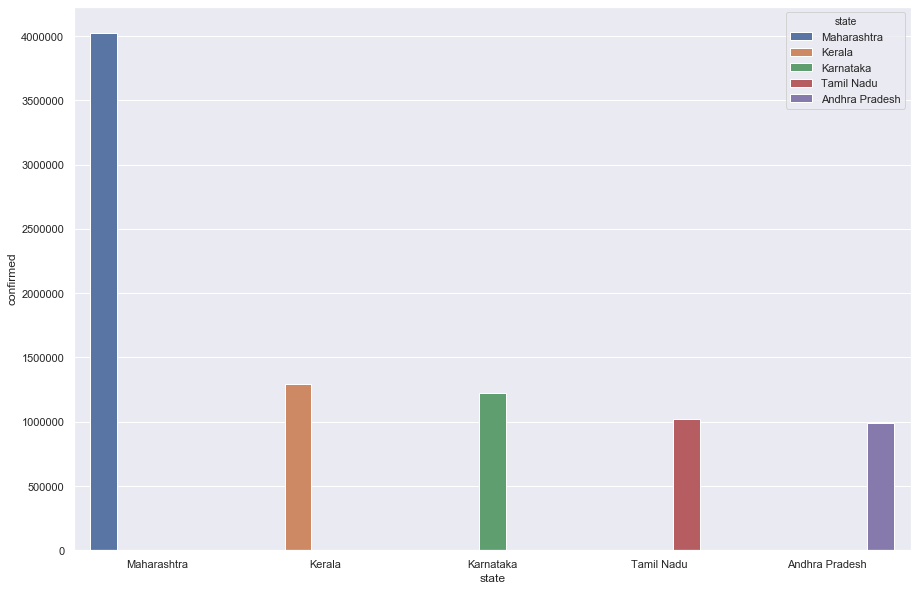

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [20]:
max_death_cases = today.sort_values(by='deaths',ascending=False)

In [21]:
top_states_death = max_death_cases[0:5]

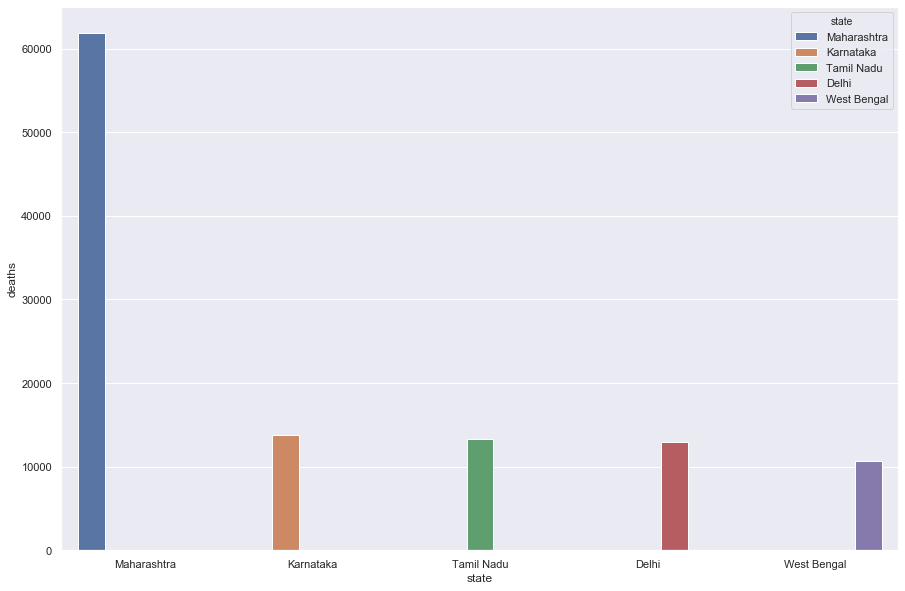

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [23]:
max_cured_today = today.sort_values(by='cured',ascending=False)
top_states_cured = max_cured_today[0:5]

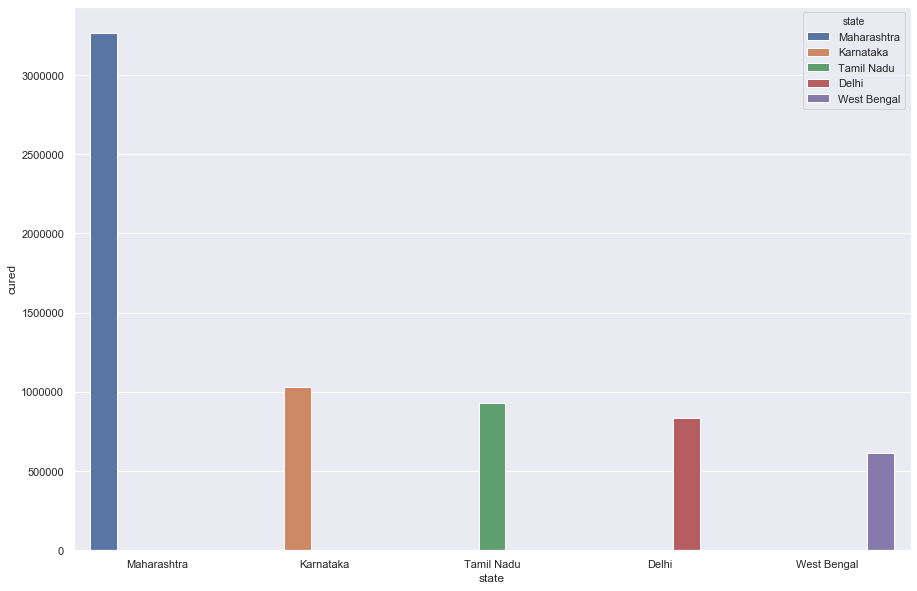

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_death,hue="state")
plt.show()

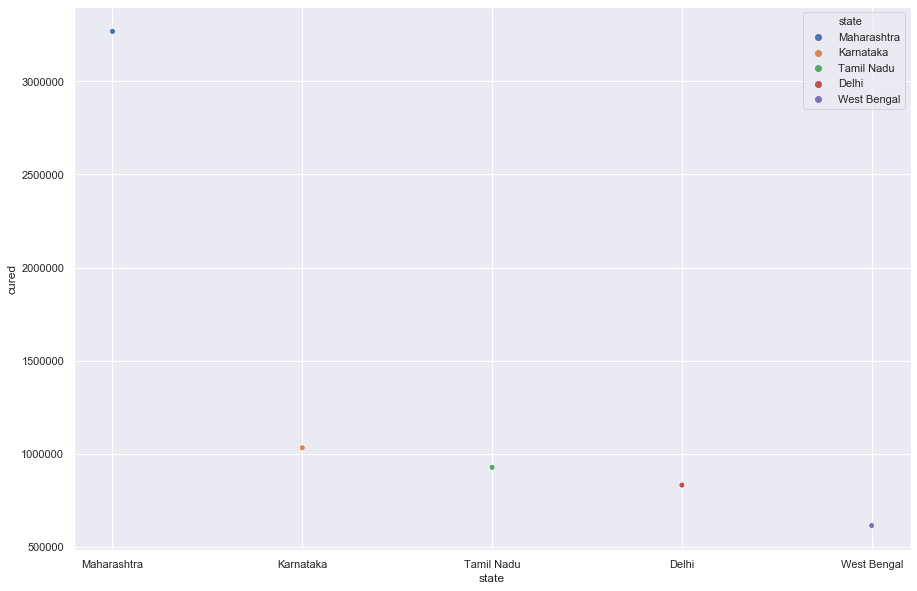

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="state",y="cured",data=top_states_death,hue="state")
plt.show()

In [26]:
mh = covid[covid.state=='Maharashtra'] 

In [27]:
print(mh.head())
mh.shape

          date        state  cured  deaths  confirmed
76  2020-03-09  Maharashtra      0       0          2
91  2020-03-10  Maharashtra      0       0          5
97  2020-03-11  Maharashtra      0       0          2
120 2020-03-12  Maharashtra      0       0         11
133 2020-03-13  Maharashtra      0       0         14


(520, 5)

In [28]:
mh.tail()

,date,state,cured,deaths,confirmed
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18094,2021-08-11,Maharashtra,6159676,134201,6363442


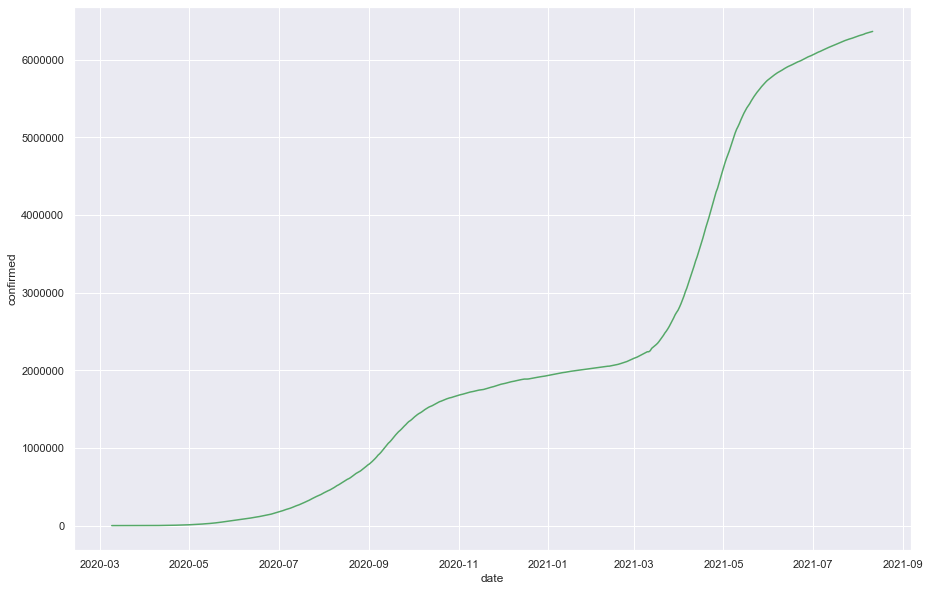

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=mh,color="g")
plt.show()

In [30]:
#similarly do it for other states

In [45]:
x=mh['date']
y=mh['confirmed']

In [1]:
from sklearn.model_selection import train_test_split

In [42]:
mh.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [49]:
mh['date']=mh['date'].map(dt.datetime.toordinal)

TypeError: descriptor 'toordinal' requires a 'datetime.date' object but received a 'int'

In [62]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [61]:
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'sklearn'

In [50]:
rf = RandomForestRegressor()

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [ ]:
rf.predict([])